In [1]:
from panel_segmentation import panel_detection as pseg
import numpy as np
from tensorflow.keras.preprocessing import image as imagex
import matplotlib.pyplot as plt
import os
from PIL import Image

#Set the current working directory as the /examples/ folder. 
os.getcwd()

'c:\\Users\\kperry\\source\\repos\\Panel-Segmentation'

# Run a system through the Panel-Segmentation detection pipeline

Use a set of latitude-longitude coordinates for an NREL site.

In [2]:
#Example image to run the pipeline on.
google_maps_api_key =  "YOUR API KEY"     
file_name_save = "./examples/Panel_Detection_Examples/sat_img.png"

Create an instance of the PanelDetection class and read in an example satellite image.

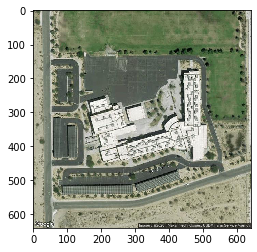

In [3]:
#CREATE AN INSTANCE OF THE PANELDETECTION CLASS TO RUN THE ANALYSIS
panelseg = pseg.PanelDetection(model_file_path ='./panel_segmentation/VGG16Net_ConvTranpose_complete.h5', 
                                classifier_file_path ='./panel_segmentation/VGG16_classification_model.h5')

img = Image.open(file_name_save)
#Show the generated satellite image
plt.imshow(img)

Load in the image and declare it as a numpy array.

In [4]:
x = imagex.load_img(file_name_save, 
                        color_mode='rgb', 
                        target_size=(640,640))
x = np.array(x)

Use the classifier model to confirm if there are solar arrays detected in the satellite image.

In [5]:
panel_loc = panelseg.hasPanels(x)
print(panel_loc)

True


First, mask the satellite image, and then crop out the panels.

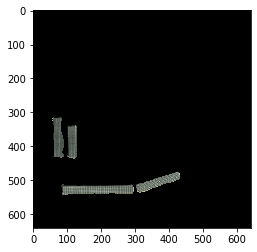

In [6]:
#Mask the satellite image
res = panelseg.testSingle(x.astype(float), test_mask=None,  model =None)    
#Use the mask to isolate the panels
new_res = panelseg.cropPanels(x, res)
plt.imshow(new_res.reshape(640,640,3))

Estimate the azimuth, assuming there is only one solar array detected in the image.

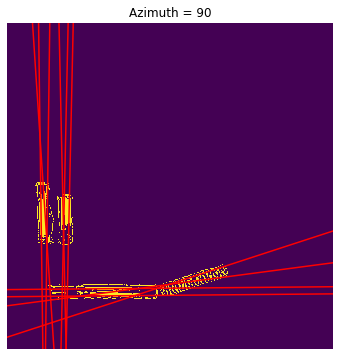

In [7]:
#check azimuth 
az = panelseg.detectAzimuth(new_res)
    
#plot edges + azimuth 
panelseg.plotEdgeAz(new_res,10, 1,                         
                    save_img_file_path = './')

There are multiple solar arrays in the image though (approximately 5), so the above estimate isn't accurate. In order to estimate the azimuth for each individual solar array in the image, we perform spectral clustering on the masked image.

C:\Users\kperry\Anaconda3\envs\pvfleets_qa_analysis\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


161
182.0
90.0
91.0


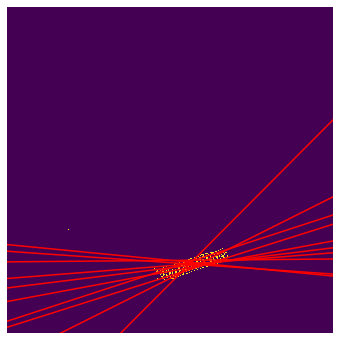

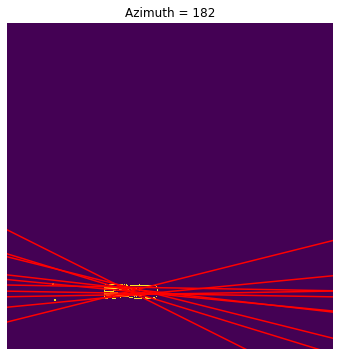

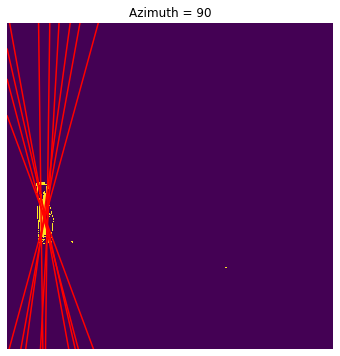

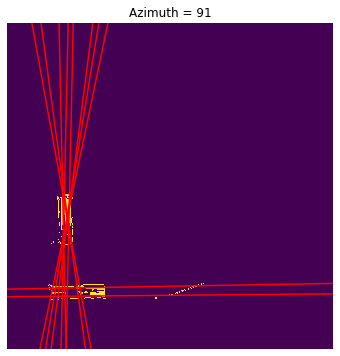

In [8]:
number_arrays = 4
#Cluster the solar arrays in the image using spectral clustering.
clusters = panelseg.clusterPanels(new_res, res,                                       
                                  number_arrays)

#Calculate the azimuth for each cluster
for ii in np.arange(clusters.shape[0]):
        az = panelseg.detectAzimuth(clusters[ii][np.newaxis,:])
        print(az)
        
#Plot the azimuth estimate for each cluster
panelseg.plotEdgeAz(clusters, 10, 1,                         
                    save_img_file_path = './examples/Panel_Detection_Examples/')